In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 2
rcParams['xtick.labelsize'] = 'large'
rcParams['ytick.labelsize'] = 'large'

In [3]:
df = pd.DataFrame(pd.read_csv("E Commerce Dataset.csv"))

In [4]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [6]:
for i in df.columns:
    percent = round(df[i].isna().sum()*100/len(df[i]),2)
    print(f'''Coloumn {i}:''')
    print('Missing values :',df[i].isna().sum(),'from ',len(df))
    print(f'''Percent missing value:''',percent, '%')
    print('---'*10)

Coloumn CustomerID:
Missing values : 0 from  5630
Percent missing value: 0.0 %
------------------------------
Coloumn Churn:
Missing values : 0 from  5630
Percent missing value: 0.0 %
------------------------------
Coloumn Tenure:
Missing values : 264 from  5630
Percent missing value: 4.69 %
------------------------------
Coloumn PreferredLoginDevice:
Missing values : 0 from  5630
Percent missing value: 0.0 %
------------------------------
Coloumn CityTier:
Missing values : 0 from  5630
Percent missing value: 0.0 %
------------------------------
Coloumn WarehouseToHome:
Missing values : 251 from  5630
Percent missing value: 4.46 %
------------------------------
Coloumn PreferredPaymentMode:
Missing values : 0 from  5630
Percent missing value: 0.0 %
------------------------------
Coloumn Gender:
Missing values : 0 from  5630
Percent missing value: 0.0 %
------------------------------
Coloumn HourSpendOnApp:
Missing values : 255 from  5630
Percent missing value: 4.53 %
------------------

## Numerical Features

In [7]:
num_fea = [features for features in df.columns if df[features].dtype != 'O']
num_fea

['CustomerID',
 'Churn',
 'Tenure',
 'CityTier',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [8]:
df[num_fea].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


## Categorical Features

In [9]:
cat_fea = [features for features in df.columns if df[features].dtype == 'O']
cat_fea

['PreferredLoginDevice',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus']

In [10]:
df[cat_fea].describe()

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


In [11]:
# Change Phone -> Mobile Phone to remove data redundancy
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace({'Phone' : 'Mobile Phone'})

In [13]:
# Change CC -> Credit Card & Cash on Delivery -> COD to eliminate data redundancy
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace({'CC' : 'Credit Card', 'Cash on Delivery' : 'COD'})

## Handling Null Values

In [14]:
df['Tenure'].fillna(df['Tenure'].median(), inplace=True)
df['WarehouseToHome'].fillna(df['WarehouseToHome'].median(), inplace=True)
df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].median(), inplace=True)
df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].median(), inplace=True)
df['CouponUsed'].fillna(df['CouponUsed'].median(), inplace=True)
df['OrderCount'].fillna(df['OrderCount'].median(), inplace=True)
df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median(), inplace=True)

In [15]:
#Checking again whether the data imputation was successful
df.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

## Handling Duplicated Data

In [16]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,9.0,Mobile Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,9.0,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Mobile Phone,1,12.0,Credit Card,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [17]:
df.duplicated().sum()

0

No duplicate data Found

## Outlier Handling

In [18]:
from scipy import stats

In [19]:
print(f'Number of rows before filtering outliers : {len(df)}')

filtered_entries = np.array ([True] * len(df))

for col in ['Tenure', 'WarehouseToHome', 'CouponUsed', 'DaySinceLastOrder', 'CashbackAmount']:
  zscore = abs(stats.zscore(df[col]))
  filtered_entries = (zscore < 3)

df = df[filtered_entries]
print(f'Number of rows after filtering outliers : {len(df)}')

Number of rows before filtering outliers : 5630
Number of rows after filtering outliers : 5619


## Feature Engineeing

In [20]:
mapping_gender = {'Female' : 0,'Male' : 1}


df['Gender'] = df['Gender'].map(mapping_gender)

In [21]:
for cat in ['PreferredLoginDevice','PreferredPaymentMode','PreferedOrderCat','MaritalStatus']:
  onehots = pd.get_dummies(df[cat], prefix=cat)
  df = df.join(onehots)

In [22]:
#drop the original category column (as it is encoded)
df = df.drop(columns=['PreferredLoginDevice','PreferredPaymentMode','PreferedOrderCat','MaritalStatus']).copy()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5619 entries, 0 to 5629
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CustomerID                           5619 non-null   int64  
 1   Churn                                5619 non-null   int64  
 2   Tenure                               5619 non-null   float64
 3   CityTier                             5619 non-null   int64  
 4   WarehouseToHome                      5619 non-null   float64
 5   Gender                               5619 non-null   int64  
 6   HourSpendOnApp                       5619 non-null   float64
 7   NumberOfDeviceRegistered             5619 non-null   int64  
 8   SatisfactionScore                    5619 non-null   int64  
 9   NumberOfAddress                      5619 non-null   int64  
 10  Complain                             5619 non-null   int64  
 11  OrderAmountHikeFromlastYear   

In [24]:
df

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,...,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,50001,1,4.0,3,6.0,0,3.0,3,2,9,...,0,0,0,1,0,0,0,0,0,1
1,50002,1,9.0,1,8.0,1,3.0,4,3,7,...,1,0,0,0,1,0,0,0,0,1
2,50003,1,9.0,1,30.0,1,2.0,4,3,6,...,0,0,0,0,1,0,0,0,0,1
3,50004,1,0.0,3,15.0,1,2.0,4,5,8,...,0,0,0,1,0,0,0,0,0,1
4,50005,1,0.0,1,12.0,1,3.0,3,5,3,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,1,30.0,1,3.0,2,1,6,...,0,0,0,1,0,0,0,0,1,0
5626,55627,0,13.0,1,13.0,1,3.0,5,5,6,...,0,1,0,0,0,0,0,0,1,0
5627,55628,0,1.0,1,11.0,1,3.0,2,4,3,...,0,0,0,1,0,0,0,0,1,0
5628,55629,0,23.0,3,9.0,1,4.0,5,4,4,...,0,0,0,1,0,0,0,0,1,0


## Feature Transformation

In [25]:
from scipy.stats import skew, kurtosis

In [28]:
feature_trans = num_fea.copy()
del feature_trans[:2]
feature_normal = []
feature_non_normal = []

for i in feature_trans:
  skw = skew(df[i])
  kts = kurtosis(df[i])
  if skw < 2 and skw > -2:
    if kts < 2 and kts > -2:
      feature_normal.append(i)
    else:
      feature_non_normal.append(i)
  else:
    feature_non_normal.append(i)

print('Distribution Normal:', feature_normal)
print('Distribution Non Normal:', feature_non_normal)

Distribution Normal: ['Tenure', 'CityTier', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CashbackAmount']
Distribution Non Normal: ['WarehouseToHome', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']


In [29]:
from sklearn.model_selection import train_test_split

In [31]:
feature = df.columns.tolist()
del feature[:2]
feature

['Tenure',
 'CityTier',
 'WarehouseToHome',
 'Gender',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount',
 'PreferredLoginDevice_Computer',
 'PreferredLoginDevice_Mobile Phone',
 'PreferredPaymentMode_COD',
 'PreferredPaymentMode_Credit Card',
 'PreferredPaymentMode_Debit Card',
 'PreferredPaymentMode_E wallet',
 'PreferredPaymentMode_UPI',
 'PreferedOrderCat_Fashion',
 'PreferedOrderCat_Grocery',
 'PreferedOrderCat_Laptop & Accessory',
 'PreferedOrderCat_Mobile',
 'PreferedOrderCat_Mobile Phone',
 'PreferedOrderCat_Others',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single']

In [34]:
# Split Data into Train & Test

In [33]:
transform = feature_normal + feature_non_normal
X = df[feature]
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
for i in transform:
  scaler = StandardScaler().fit(X_train[[i]])
  X_train[i] = scaler.transform(X_train[[i]])
  X_test[i] = scaler.transform(X_test[[i]])

X_train.head()

,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
3924,1.306801,1.500520,-0.779734,1,0.084913,0.306939,0.668818,1.862855,-0.622729,-1.018592,...,0,0,0,1,0,0,0,0,1,0
2198,-1.209991,-0.701138,-0.191320,1,-1.324215,-0.668175,1.389097,-0.845974,-0.622729,2.584036,...,0,0,0,0,1,0,0,0,0,1
5349,-0.371060,1.500520,-0.779734,1,1.494042,0.306939,-1.492020,-0.458998,-0.622729,-0.187216,...,0,0,0,1,0,0,0,0,1,0
1337,0.228176,1.500520,1.691603,0,-1.324215,0.306939,-1.492020,-1.232950,-0.622729,-1.295717,...,0,0,1,0,0,0,0,0,1,0
1486,0.947259,-0.701138,2.280017,1,-1.324215,-0.668175,-1.492020,0.701928,-0.622729,-0.741467,...,0,0,0,0,1,0,0,0,0,1


## Class Imbalance

Because the classification target in model will be carried out using the 'churn' column, it is necessary to check whether the 'churn' column has imbalanced or balanced data.

In [38]:
df['Churn_Class'] = df['Churn']>0.9
print(df['Churn_Class'].value_counts())

False    4671
True      948
Name: Churn_Class, dtype: int64


Displays the number of churn and non-churn customers, makes the target of categorical type

In [39]:
x = df[[col for col in df.columns if col not in ['Churn_Class','Churn']]].values
y = df['Churn_Class'].values
print(x.shape)
print(y.shape)

# Separation of features and targets

(5619, 31)
(5619,)


In [40]:
y.shape

(5619,)

In [41]:
y_train.shape

(3933,)

In [42]:
print(pd.Series(y_train).value_counts())

0    3255
1     678
Name: Churn, dtype: int64


In [43]:
X_train.shape

(3933, 30)

In [46]:
pip install -U imbalanced-learn

  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [48]:
#Over Sampling using SMOTE
from imblearn import over_sampling
X_train_smote, y_train_smote = over_sampling.SMOTE(random_state=3).fit_resample(X_train, y_train)

In [49]:
# Before Oversampling
print('Target before oversampling:')
print(pd.Series(y_train).value_counts())

Target before oversampling:
0    3255
1     678
Name: Churn, dtype: int64


In [50]:
# After Oversampling
print('Target after oversampling:')
print(pd.Series(y_train_smote).value_counts())

Target after oversampling:
0    3255
1    3255
Name: Churn, dtype: int64


In [51]:
y_train_smote

0       0
1       0
2       0
3       0
4       0
       ..
6505    1
6506    1
6507    1
6508    1
6509    1
Name: Churn, Length: 6510, dtype: int64

In [52]:
X_train_smote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6510 entries, 0 to 6509
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Tenure                               6510 non-null   float64
 1   CityTier                             6510 non-null   float64
 2   WarehouseToHome                      6510 non-null   float64
 3   Gender                               6510 non-null   int64  
 4   HourSpendOnApp                       6510 non-null   float64
 5   NumberOfDeviceRegistered             6510 non-null   float64
 6   SatisfactionScore                    6510 non-null   float64
 7   NumberOfAddress                      6510 non-null   float64
 8   Complain                             6510 non-null   float64
 9   OrderAmountHikeFromlastYear          6510 non-null   float64
 10  CouponUsed                           6510 non-null   float64
 11  OrderCount                    

## Modeling The Data

## Model Evaluate(default)

In [53]:
# Model Evaluation Classification test

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

## Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dt = DecisionTreeClassifier(random_state=3)
dt.fit(X_train, y_train)
eval_classification(dt)

Accuracy (Test Set): 0.94
Precision (Test Set): 0.80
Recall (Test Set): 0.87
F1-Score (Test Set): 0.83
roc_auc (test-proba): 0.91
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9705914504568053


## Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression(random_state=3)
logreg.fit(X_train, y_train)
eval_classification(logreg)

Accuracy (Test Set): 0.89
Precision (Test Set): 0.69
Recall (Test Set): 0.54
F1-Score (Test Set): 0.61
roc_auc (test-proba): 0.88
roc_auc (train-proba): 0.90
roc_auc (crossval train): 0.8863608778304093
roc_auc (crossval test): 0.8845690329472589


## ADABoost

In [56]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state=3)
ada.fit(X_train, y_train)
eval_classification(ada)

Accuracy (Test Set): 0.89
Precision (Test Set): 0.67
Recall (Test Set): 0.58
F1-Score (Test Set): 0.62
roc_auc (test-proba): 0.91
roc_auc (train-proba): 0.93
roc_auc (crossval train): 0.9296688107323204
roc_auc (crossval test): 0.9187608592018532


## XGBoost

In [58]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [59]:
from xgboost import XGBClassifier

xg = XGBClassifier(random_state=3)
xg.fit(X_train, y_train)
eval_classification(xg)

Accuracy (Test Set): 0.97
Precision (Test Set): 0.92
Recall (Test Set): 0.91
F1-Score (Test Set): 0.92
roc_auc (test-proba): 0.99
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9990793002002156


## Random Forest Model

In [60]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=3)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
eval_classification(rf)

Accuracy (Test Set): 0.96
Precision (Test Set): 0.93
Recall (Test Set): 0.82
F1-Score (Test Set): 0.87
roc_auc (test-proba): 0.99
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9991317190198131


To avoid false positive churn, we decided to choose a model with the smallest ROC-AUC gap and the highest precision. From several model test results, **Random Forest** is the most suitable algorithm model.

In [61]:
# Random Forest Model after oversampling
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=3)
rf.fit(X_train_smote, y_train_smote)

y_pred_over = rf.predict(X_test)
eval_classification(rf)

Accuracy (Test Set): 0.95
Precision (Test Set): 0.86
Recall (Test Set): 0.82
F1-Score (Test Set): 0.84
roc_auc (test-proba): 0.98
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9991317190198131


# K-Fold Cross Validation

## Check Train & Validation in each iteration

In [62]:
from sklearn.model_selection import KFold

import pandas as pd

dataset = df
X = df[feature]
y = df['Churn']
kf = KFold(n_splits=5, random_state=3, shuffle=True)
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validatorprint(kf)

5

In [63]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

TRAIN: [   1    2    3 ... 5616 5617 5618] TEST: [   0    6    9 ... 5609 5611 5613]
TRAIN: [   0    1    2 ... 5616 5617 5618] TEST: [   4    8   19 ... 5600 5607 5614]
TRAIN: [   0    1    2 ... 5614 5616 5618] TEST: [   3    5   16 ... 5612 5615 5617]
TRAIN: [   0    3    4 ... 5614 5615 5617] TEST: [   1    2   10 ... 5608 5616 5618]
TRAIN: [   0    1    2 ... 5616 5617 5618] TEST: [   7   13   14 ... 5604 5605 5606]


## Cross Validation in Validation Set Only

In [64]:
from sklearn.model_selection import cross_val_score
model = RandomForestClassifier()
result = cross_val_score(model, X, y, cv=kf, scoring='roc_auc')
result.mean()

0.9898485086133132

## Cross Validation in Train Set & Validation Set

In [65]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
model = RandomForestClassifier()
score = cross_validate(model, X, y, cv=kf, scoring='roc_auc', return_train_score=True)
print('roc_auc (train): '+ str(score['train_score'].mean()))
print('roc_auc (test): '+ str(score['test_score'].mean()))

roc_auc (train): 1.0
roc_auc (test): 0.9906322807557192


After k-fold cross validation, the model is best-fit, as can be seen from the train scores and test scores, which have very small differences.

## HyperParameter Tuning

In [67]:
# Hyperparameter Tuning RandomForest
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(700, 800, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=3)
rs = RandomizedSearchCV(rf, hyperparameters, scoring='roc_auc', random_state=3, cv=5)
rs.fit(X_train_smote, y_train_smote)
eval_classification(rs)

Accuracy (Test Set): 0.86
Precision (Test Set): 0.67
Recall (Test Set): 0.30
F1-Score (Test Set): 0.42
roc_auc (test-proba): 0.82
roc_auc (train-proba): 0.83
roc_auc (crossval train): 0.9974605168250431
roc_auc (crossval test): 0.9857799176417457


In [73]:
rf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=3)

## Learning Curve

param value: 10; train: 0.99580605048124; test: 0.7864432662940126
param value: 10; train: 0.9951904785500741; test: 0.7658704546764248
param value: 11; train: 0.9945703761907122; test: 0.8021005013542328
param value: 11; train: 0.9948846746468272; test: 0.7798709156918112
param value: 12; train: 0.9931779302078098; test: 0.7624963983172938
param value: 13; train: 0.9929124282387254; test: 0.8079784475306864
param value: 13; train: 0.9932130410263307; test: 0.7709329798882039
param value: 14; train: 0.9921495230072604; test: 0.779640407998617
param value: 14; train: 0.991737820344926; test: 0.7965308592174264
param value: 15; train: 0.9910339050639333; test: 0.778551259148274
param value: 16; train: 0.9897365980731522; test: 0.7889932576499742
param value: 16; train: 0.9906508007295878; test: 0.7786665129948712
param value: 17; train: 0.9896011571468685; test: 0.7724255172016365
param value: 17; train: 0.9897426386440805; test: 0.803255921166369
param value: 18; train: 0.98794556879290

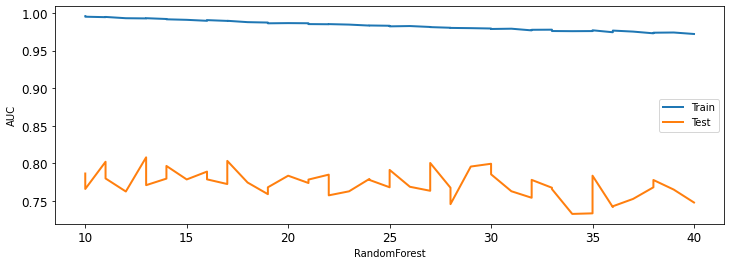

In [69]:
# param_values = [int(x) for x in np.linspace(700, 800, 50)] # n_estimators
# param_values = [int(x) for x in np.linspace(750, 800, 50)] # max_depth
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_split
param_values = [int(x) for x in np.linspace(10, 40, 50)] # min_samples_leaf

train_scores = []
test_scores = []

for i in param_values:
    model = RandomForestClassifier(n_estimators=75, min_samples_leaf=i)
    model.fit(X_train_smote, y_train_smote)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train_smote)
    train_auc = roc_auc_score(y_train_smote, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.ylabel('AUC')
plt.xlabel('RandomForest')
plt.legend()
plt.show()

# Classification Report 

In [70]:
from sklearn.metrics import classification_report

In [78]:
y_test.shape

(1123,)

In [79]:
y_pred.shape

(1686,)

In [81]:
# print(classification_report(y_test, y_pred))

## Feature Importance

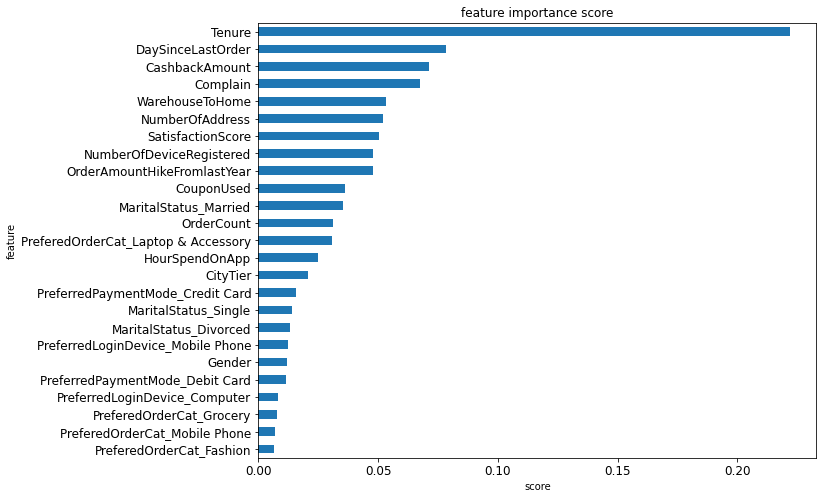

In [74]:
show_feature_importance(rf)

In [76]:
pip install shap

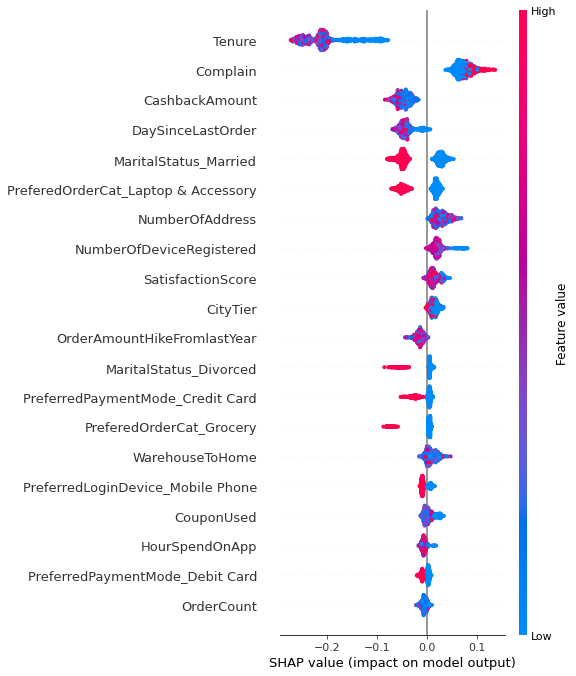

In [80]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test)